In [1]:
# initial setup
%run "../../../common/0_notebooks_base_setup.py"


/media/paulati/Nuevo vol/paula/dh/2021/dsad_2021_paula/common
default checking
Running command `conda list`... ok
jupyterlab=2.2.6 already installed
pandas=1.1.5 already installed
bokeh=2.2.3 already installed
seaborn=0.11.0 already installed
matplotlib=3.3.2 already installed
ipywidgets=7.5.1 already installed
pytest=6.2.1 already installed
chardet=4.0.0 already installed
psutil=5.7.2 already installed
scipy=1.5.2 already installed
statsmodels=0.12.1 already installed
scikit-learn=0.23.2 already installed
xlrd=2.0.1 already installed
nltk=3.5 already installed
unidecode=1.1.1 already installed
pydotplus=2.0.2 already installed
pandas-datareader=0.9.0 already installed
flask=1.1.2 already installed


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<link rel="stylesheet" href="../../../common/dhds.css">
<div class="Table">
    <div class="Row">
        <div class="Cell grey left"> <img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M5/CLASE_34_CART/Presentacion/img/M5_CLASE_34_portada.png" align="center" width="90%"/></div>        
        <div class="Cell right">
            <div class="div-logo"><img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/common/logo_DH.png" align="center" width=70% /></div>
            <div class="div-curso">DATA SCIENCE</div>
            <div class="div-modulo">MÓDULO 5</div>
            <div class="div-contenido">CART - <b>C</b>lassification <b>a</b>nd <b>R</b>egression <b>T</b>rees</div>
        </div>
    </div>
</div>

## Agenda

---

- Describir que es un árbol de decisión

- Explicar cómo funciona un árbol de clasificación

- Explicar cómo funciona un árbol de regresión

<div class="div-dhds-fondo-1"> Introducción
<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M5/CLASE_34_CART/Presentacion/img/M5_CLASE_34_separador.png" align="center" />

</div>

## Introducción

---

Los árboles de Decisión y los ensambles son herramientas de Machine Learning muy potentes que nos permiten resolver problemas complejos de manera performante. 

Además, son **fáciles de visualizar y comunicar**, resultando extremadamente poderosos en un contexto en el que participan actores no técnicos.

Comencemos con un ejemplo


Triage es un método de selección y **clasificación de pacientes** empleado en la enfermería y la medicina de emergencias y desastres. 
 
Evalúa las prioridades de atención, privilegiando la posibilidad de supervivencia, de acuerdo con las necesidades terapéuticas y los recursos disponibles. 

Trata por tanto de evitar que se retrase la atención del paciente, que empeoraría su pronóstico por la demora en su atención.


Consideremos como ejemplo el método Triage para la clasificación de heridos según su gravedad. 

Aquí los colores determinan la gravedad del paciente.


<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M5/CLASE_34_CART/Presentacion/img/M5_CLASE_34_Triage.png" align="center" />


El árbol da una **regla precisa para decidir** la gravedad del paciente, **dependiendo de los valores tomados por las variables**.

La **interpretación del modelo es extremadamente simple** lo que facilita su comunicación a gente no técnica.


## ¿Qué es un árbol de decisión?

---

Los árboles de decisión son una **técnica de aprendizaje** estadístico que puede usarse para **regresión** y para **clasificación**. 


- Las técnicas de árbol implican **estratificar o segmentar el espacio de predictores** en un número de **regiones simples**.  

    - Para hacer una predicción para una observación dada típicamente se usa la media o la moda de la variable de respuesta para la región a la que pertenece la observación. 
    

- Los métodos basados en árboles son simples y útiles para la interpretación. Sin embargo, **típicamente no son competitivos en términos de precisión predictiva** con los mejores enfoques basados en aprendizaje supervisado.  

- Veremos que la **combinación de un gran número de árboles puede llevar a mejoras sustanciales en la precisión** de las predicciones a cambio de cierta pérdida en la interpretabilidad de los resultados.



<div class="div-dhds-fondo-1"> Árboles de Regresión
<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M5/CLASE_34_CART/Presentacion/img/M5_CLASE_34_separador.png" align="center" />

</div>

## Ejemplo: Árboles de regresión para predecir el salario de un jugador de baseball

---

El logaritmo del salario está representado por los colores. Los puntos <a style="color:blue;">AZULES </a>representan los salarios más bajos y los <a style="color:red;">ROJOS</a> los más altos. 

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M5/CLASE_34_CART/Presentacion/img/M5_CLASE_34_baseball1.png" align="center"/>


**¿Cómo segmentarían el espacio para separar los salarios?**


Podemos hacer una primera partición en los **Años**. 

Separamos las observaciones con menos de aprox. 5 años

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M5/CLASE_34_CART/Presentacion/img/M5_CLASE_34_baseball2.png" align="center"/>



Luego podemos dividir por la cantidad de **Hits**. 

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M5/CLASE_34_CART/Presentacion/img/M5_CLASE_34_baseball3.png" align="center"/>



Para estos datos, representamos un árbol de regresión para predecir el logaritmo del salario de un jugador de beisball, basado en la cantidad de años que ha jugado en las ligas mayores y la cantidad de hits que hizo en el año anterior:

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M5/CLASE_34_CART/Presentacion/img/M5_CLASE_34_arbol_1.png" align="center"/>

En un nodo interno dado, la etiqueta, de la forma $X_j \lt t_k$, indica la rama izquierda que resulta de esa división, y la rama derecha corresponde a $X_j \ge t_k$. 



Por ejemplo, la división en la parte superior del árbol da como resultado dos ramas grandes:

- La rama de la izquierda corresponde a Años $\lt$ 4.5

- La rama de la derecha corresponde a Años $\ge$ 4.5. 

El número en cada hoja es la media de la respuesta de las observaciones que caen allí.

Entonces


- Para los jugadores con menos de 4.5 años de experiencia el salario pronosticado está dado por la media de los salarios de jugadores con menos de 4.5 años de experiencia. Para esos jugadores la media de los logaritmos de los salario es 5.107 por lo que valor pronosticado para el salario es $e^{5.107}$ miles de dólares o  $165,174 

- Para los jugadores con experiencia $\ge 4.5$ existen dos grupos posibles en base a sus hits: aquellos con menos de 118 la temporada pasada, con salario esperado de $e^{5.999} = \$402,834$, y otro grupo con al menos 118 hits la temporada pasada $e^{6.740} = \$845,346 $.

- Estas tres regiones pueden escribirse como 
    - $R_1 = \{X | Years \lt 4.5 \}$
    - $R_2 = \{X | Years \ge 4.5, Hits \lt 117.5 \}$
    - $R_3 = \{X | Years \ge 4.5, Hits \ge 117.5 \}$


- Las regiones $R_1$, $R_2$,  y $R_3$ se conocen como nodos terminales u hojas del árbol. 

- Los nodos en el árbol donde el espacio de predictores es particionado se conocen como nodos internos.

- Las aristas del árbol que conectan los nodos se denominan ramas. 


## ¿Como construimos las regiones de un árbol de regresión?

---

El objetivo es encontrar cajas  $R_1$,...,$R_J$ que minimizan la suma de residuos al cuadrado (RSS) dada por: 

$$  \sum_{j=1}^J \sum_{i \in R_j}(y_i - \hat{y}_{R_j})^2$$






Donde $\hat{y}_{R_j}$ es la media de y de la caja $R_j$.

### Problema

**No es factible computacionalmente considerar todas las posibles particiones del espacio de atributos en J cajas.**

Por esta razón se usa un enfoque de arriba hacia abajo "greedy" que es conocido como **recursive binary splitting**. 

Recursive binary splitting  comienza  en la parte de arriba del árbol (donde todas las observaciones pertenecen a una sola región) y sucesivamente particiona el espacio de predictores. Cada nueva división se indica mediante dos nuevas ramas que sigue hacia abajo en el árbol. 


## Recursive binary splitting

---

### Características del método 

* **recursivo**: divide el trabajo en partes, y resuelve cada parte dividiéndolas a su vez en partes más pequeñas.

* **voraz (greedy)**: porque en cada paso de la construcción del árbol se busca la mejor división en ese punto en particular en lugar de mirar hacia adelante y elegir una división que llevaría a un mejor árbol en un paso futuro. 

* **óptimo local**: no alcanza la mejor solución de todas las posibles, sino una solución localmente óptima.

El algoritmo funciona dividiendo recursivamente los registros en subconjuntos cada vez más pequeños. 


### Algoritmo

**1.** **Seleccionamos el predictor $X_j$ y el punto de corte $s$** tal que separar el espacio de predictores en las regiones $\{ X | X_j \lt s \} y \{ X | Xj \ge s \}$ **lleva a la mayor reducción posible de la métrica RSS**. 

Para esto debemos considerar todos los predictores $X_1,...,X_p$, y todos los valores posibles de los puntos de corte $s$ para cada uno de los predictores y luego elegir el predictor y punto de corte tal que  el árbol resultante tiene el menor valor de RSS. 

En más detalle, definimos las regiones como:

$R_1(j, s) = \{ X | X_j \lt s \}$

$R_2(j, s) = \{ X | X_j \ge s \}$

Y buscamos minimizar la siguiente expresión eligiendo $X_j$ y $s$ dado que los valores pronosticados para cada región están dados por el promedio de la y en esa partición. 

$ \sum_{i: x_i \in R_1(j, s)}(y_i - \hat{y}_{R_1})^2 + \sum_{i: x_i \in R_2(j, s)}(y_i - \hat{y}_{R_2})^2$




**2.** A continuación repetimos el proceso buscando el mejor predictor y el mejor punto de corte para volver a dividir los datos con el objetivo de minimizar el valor de RSS para la nueva partición.  Pero esta vez en lugar de dividir el espacio de predictores completo, dividimos una de las regiones identificadas previamente.
 


**3**. Ahora tenemos 3 regiones. Volvemos a buscar una división de estas 3 regiones para minimizar el valor de RSS. 

El proceso continúa hasta que se cumple con algún criterio de detención (por ejemplo cantidad de observaciones en cada región)

Una vez que tenemos creadas las regiones  $R_1,...,R_J$ predecimos la respuesta de una observación de test en base a la **media de las observaciones de training en la región** a la que pertenece la observación de test. 


### Resultado

Arriba: la salida de la división binaria recursiva en un ejemplo bidimensional. 

Abajo a la izquierda: un árbol correspondiente a la partición en el panel superior. 

Abajo a la derecha: una gráfica en perspectiva de la superficie de predicción correspondiente a ese árbol.

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M5/CLASE_34_CART/Presentacion/img/M5_CLASE_34_arbol_2.png" align="center" />

<div class="div-dhds-fondo-1"> Árboles de Clasificación
<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M5/CLASE_34_CART/Presentacion/img/M5_CLASE_34_separador.png" align="center" />

</div>

## Árboles de clasificación

---

* Un árbol de clasificación es muy similar a uno de regresión excepto que se utiliza para predecir una variable cualitativa en lugar de una cuantitativa. 

* La predicción se obtiene como la **etiqueta mayoritaria para las observaciones de training dentro de la región** a la que pertenece una observación. 

* Para construir el árbol usamos recursive binary splitting pero con un criterio distinto a RSS. Una alternativa natural es la tasa de error de clasificación. Como vamos a clasificar a una observación de acuerdo a la clase más frecuente en su región, la **tasa de error de clasificación** es simplemente la **fracción de las observaciones de training en esa región que no pertenecen a la clase mayoritaria**. 



## Tasa de error de clasificación

---

$\hat{p}_{mk}$ representa la proporción de observaciones de entrenamiento en la m-ésima región que pertenecen a la k-ésima clase

$ max_k(\hat{p}_{mk})$ se obtiene para el valor de k que corresponde a la clase mayoritaria en la región m

$E = 1 - max_k(\hat{p}_{mk})$ es el error de clasificación en la región $m$

La **tasa de error de clasificación no es suficientemente sensible** para construir el árbol y en la práctica se prefieren otras dos medidas.


## Concepto de Impureza

---

Clasificamos según el color de las figuras y obtenemos estos nodos terminales 

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M5/CLASE_34_CART/Presentacion/img/M5_CLASE_34_impureza.png" align="center" />




## Índice de Gini

---

$$G = \sum_{k=1}^K \hat{p}_{mk} . (1 - \hat{p}_{mk})$$

donde $\hat{p}_{mk}$ representa la proporción de observaciones de entrenamiento en la m-ésima región que pertenecen a la k-ésima clase


El índice de Gini

* mide la varianza total a lo largo de las K clases para cada nodo terminal m. 

* toma valores chicos cuando las proporciones son cercanas a 1 ó 0. 

* **se considera como una medida de pureza** de los nodos terminales, un valor pequeño indica que un nodo contiene predominantemente observaciones de una misma clase. 



## Entropía

--- 

$$D = - \sum_{k = 1}^K{\hat{p}_{mk} . log(\hat{p}_{mk})}$$

donde $\hat{p}_{mk}$ representa la proporción de observaciones de entrenamiento en la m-ésima región que pertenecen a la k-ésima clase

* Como el índice de Gini, la entropía tomará un valor pequeño si los nodos son "puros". 

* Cuando se construye un árbol de clasificación típicamente el Gini index o la entropía son usados para evaluar la calidad de una división en particular porque estas medidas son más sensibles a la pureza de los nodos que la tasa de error de clasificación.  


<div class="div-dhds-fondo-1"> Optimización
<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M5/CLASE_34_CART/Presentacion/img/M5_CLASE_34_separador.png" align="center" />

</div>

## Funciones de optimización

---

Si queremos clasificar según el color de las figuras, y podemos seleccionar por forma ó tamaño, ¿que partición conviene realizar?

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M5/CLASE_34_CART/Presentacion/img/M5_CLASE_34_ejemplo.png" align="center" />

En este caso conviene utilizar la forma, ya que así las particiones resultantes son más puras.


### ¿Cómo determinamos la mejor división entre todas las divisiones posibles?

---

Considerando que no es necesario dividir cuando todos los registros pertenecen a la misma clase pura, en cada paso **buscaremos crear la partición con la pureza más alta posible**.

Para hacer esto, necesitaremos una función objetivo para optimizar, que mida la **ganancia en pureza de una división particular**. 

Por lo tanto, queremos que dependa de la distribución de clases en los nodos (antes y después de la división). 


<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M5/CLASE_34_CART/Presentacion/img/M5_CLASE_34_funciones_optimizacion.png" align="center" />

Las tres funciones tienen su máximo en 0.5 y sus mínimos en 0 y 1.

## Ganancia en árboles de clasificación

---

Las medidas de impureza por sí solas, no son suficientes para decirnos cómo funcionará la división. Todavía tenemos que **comparar la medida de impureza antes y después de la división**. Podemos hacer esta comparación usando la **ganancia**:

$$\Delta = I(padre) - \sum_{j \in hijos} \frac{N_j}{N}. I(hijo_j) $$

Donde 

* $I$ es la medida de impureza, 
* $N_j$ es el número de registros en el nodo hijo $j$ y 
* $N$ es el número de registros en el nodo padre.

Cuando $I$ es la entropía, esta cantidad se llama **ganancia de información**.

### ¿Qué propiedades debe satisfacer una medida de impureza?

* Ser cero cuando hay una sola clase

* Ser máxima cuando hay igual cantidad de observaciones de cada una de las clases



## Ganancia en árboles de regresión

---

En el caso de regresión, la variable resultado no es una categoría sino un valor continuo. Por lo tanto, no podemos usar la misma medida de impureza que utilizamos para la clasificación.

**Si el objetivo es predecir un valor numérico, la varianza de dicho valor en un nodo nos da una medida de impureza de dicho valor.**

Utilizaremos el **Error Cuadrático Medio como medida de impureza** y la función a maximizar seguirá siendo la ganancia.

$$\Delta = ECM(padre) - \sum_{j \in hijos} \frac{N_j}{N}. ECM(hijo_j) $$

El objetivo es buscar la ganancia máxima, donde 

* $ECM$ es el Error Cuadrático Medio, 
* $N_j$ es el número de registros en el nodo hijo $j$ y 
* $N$ es el número de registros en el nodo padre

Recordemos que $ECM = \frac{1}{N} . \sum ( predicted(x) - real(x) )^2 $

## Poda

---

El proceso anterior puede producir buenas predicciones en el conjunto de entrenamiento pero es **probable que sobreajuste** estos datos. 

Esto ocurre porque el árbol resulta demasiado complejo. 

Un **árbol más pequeño**, con menos divisiones (menos regiones R1, .. RJ), podría tener **menos varianza** y ser más interpretable teniendo como costo un **mayor sesgo**. 

Hay dos maneras de podar un árbol: antes de armar el árbol completo (**pre-poda**) ó armar el árbol más grande posible y luego podarlo (**post-poda**). 




### Pre-proda

---

Una técnica para evitar el overfitting es limitar el crecimiento del árbol. Esta técnica se llama pre-poda.

Posibles criterios de pre-poda:

* Reducción mínima de impureza

* Establecer un límite máximo a la profundidad

* Establecer un número mínimo de observaciones por hoja

* Establecer un número máximo de hojas




### Post-poda

---

Otra técnica consiste en armar el árbol más grande posible $T_0$ y luego podarlo (post-poda). 

En lugar de considerar cada posible subárbol podríamos incluir una penalización por la complejidad regulada por un parámetro de tunning alpha no negativo. 

Para cada alpha se corresponde un subárbol  $T \subset T_0$ tal que: 

$$\sum_{m = 1} ^ {|T|} \sum_{i: x_i \in R_m}(y_i - \hat{y}_{R_m})^2 + \alpha |T|$$

Donde

* $m$ recorre las regiones (nodos terminales) definidas por el árbol

* $i$ recorre todos las observaciones ($x_i$) en una región $m$ particular

* $\hat{y}_{R_m}$ es el estimador del valor de $y$ en una región $m$ particular

* $|T|$ indica el número de nodos terminales del árbol. 

* $\alpha$ es el parámetro de tunning que controla el trade-off entre la complejidad del subárbol y su ajuste a los datos de entrenamiento. 

Con $ \alpha = 0$, el subárbol $T$ será igual a $T_0$. 

Al aumentar  $\alpha$ el precio a pagar por tener más nodos terminales aumenta, y la expresión anterior se minimiza para un subárbol más pequeño. ¿Lasso?

Podemos elegir $\alpha$  usando cross validation, y luego entrenamos el subárbol correspondiente a ese valor de $\alpha$.


<div class="div-dhds-fondo-1"> Conclusiones
<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M5/CLASE_34_CART/Presentacion/img/M5_CLASE_34_separador.png" align="center" />

</div>

## Conclusiones

---

### Ventajas

* Los árboles son muy fáciles de explicar a las personas.

* Parecen más cercanos a la forma en la que las personas toman decisiones 

* Pueden ser representados gráficamente, pueden ser interpretados por no expertos fácilmente (especialmente árboles pequeños)

* Pueden manejar fácilmente predictores cualitativos sin necesidad de crear variables dummy.



### Desventajas

* En general no tienen el mismo nivel de precisión en la predicción comparados con otros enfoques para regresión y clasificación vistos previamente. 

* Pueden ser poco robustos: un pequeño cambio en los datos puede generar un gran cambio el árbol final estimado. Sin embargo al combinar muchos árboles de decisión usando métodos como bagging, random forests, y boosting la performance predictiva de los árboles mejora sustancialmente. 


<div class="div-dhds-fondo-1"> Hands-on
<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M5/CLASE_34_CART/Presentacion/img/M5_CLASE_34_separador.png" align="center" />

</div>

## Datos

---

Hitters.csv está disponible en la carpeta Data de esta clase.

### Contexto

Este conjunto de datos es parte del paquete R ISLR y se utiliza en el libro e G. James et al. (2013) "Introducción al aprendizaje estadístico con aplicaciones en R"

### Contenido

Este conjunto de datos se tomó originalmente de la biblioteca StatLib que se mantiene en la Universidad Carnegie Mellon. Los datos salariales fueron originalmente de Sports Illustrated, 20 de abril de 1987. Las estadísticas de 1986 y de carrera se obtuvieron de The 1987 Baseball Encyclopedia Update publicado por Collier Books, Macmillan Publishing Company, Nueva York.




### Formato

El dataset tiene 322 observaciones de jugadores de Grandes Ligas sobre las siguientes 20 variables.

* AtBat: Number of times at bat in 1986
* Hits: Number of hits in 1986
* HmRun: Number of home runs in 1986
* Runs: Number of runs in 1986
* RBI: Number of runs batted in in 1986
* Walks: Number of walks in 1986
* Years: Number of years in the major leagues
* CAtBat: Number of times at bat during his career
* CHits: Number of hits during his career
* CHmRun: Number of home runs during his career
* CRuns: Number of runs during his career
* CRBI: Number of runs batted in during his career
* CWalks: Number of walks during his career
* League: A factor with levels A and N indicating player’s league at the end of 1986


* Division: A factor with levels E and W indicating player’s division at the end of 1986
* PutOuts: Number of put outs in 1986
* Assists: Number of assists in 1986
* Errors: Number of errors in 1986
* Salary: 1987 annual salary on opening day in thousands of dollars
* NewLeague: A factor with levels A and N indicating player’s league at the beginning of 1987

Games, G., Witten, D., Hastie, T., and Tibshirani, R. (2013) An Introduction to Statistical Learning with applications in R, www.StatLearning.com, Springer-Verlag, New York.

## Ejercicio 
---

Dado el dataset Hitters, queremos predecir el valor del logaritmo de la variable Salary.

Para eso:

1. Eliminemos todos los registros con valores faltantes

2. Creeemos 

    2.1 el conjuntos de features con todas las variables numéricas (para simplificar, eliminemos las variables categóricas "League", "Division", "NewLeague") y 
    
    2.2 el vector target (log de Salary)

3. Creemos los conjuntos de entrenamiento y test

4. Usando un árbol de regresión (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html), entrenemos el modelo usando los valores por default de los hiperparámetros


5. Grafiquemos dos scatterlot para ver que el modelo está sobreajustando los datos de entrenamiento

    5.1 x = y_train, y = y_pred_train
    
    5.2 x = y_test, y = y_pred_test
    
6. Usemos el método `plot_tree` para graficar el árbol de regresión construido en 4 (my_tree).

    <code>tree.plot_tree(my_tree,feature_names = X.columns,filled=True,rounded=True)
    print()   
    </code>

7. Usemos grid search y cross validation con `neg_mean_squared_error` como métrica para determinar los mejores valores de los hiperparámetros 

    * ccp_alpha: entre 0 y 5 con paso 0.1

    * max_depth: entre 1 y 9 con paso 1

    * min_samples_split: entre 3 y 10 con paso 1

8. Para verificar que se redujo el overfitting, repitamos los gráficos de punto 5 para el mejor modelo seleccionado en cross validation.

In [3]:
import pandas as pd
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.metrics import mean_squared_error


## Solución

---


In [4]:
import pandas as pd
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.metrics import mean_squared_error


In [5]:
data = pd.read_csv("../Data/Hitters.csv")
data.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


1. 

In [6]:
print(data.shape)
data_complete = data.dropna()
print(data_complete.shape)

(322, 20)
(263, 20)


2. 

In [7]:
columns = [ x for x in data_complete.columns if x not in ["Salary",  "League", "Division", "NewLeague"]]
X = data_complete.loc[:, columns]
print(X.shape)
X.head()

(263, 16)


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25


In [8]:
y =  np.log(data_complete.loc[:, 'Salary'])
print(y.shape)
y.head()

(263,)


1    6.163315
2    6.173786
3    6.214608
4    4.516339
5    6.620073
Name: Salary, dtype: float64

3. 

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=127)

4. 

In [10]:
my_tree = tree.DecisionTreeRegressor(random_state=40)
my_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=40)

5.

In [11]:
y_train_pred = my_tree.predict(X_train)
y_test_pred = my_tree.predict(X_test)

In [12]:
mean_squared_error(y_train, y_train_pred) 

0.0

In [13]:
mean_squared_error(y_test, y_test_pred) 

0.387171197540024

<AxesSubplot:xlabel='Salary'>

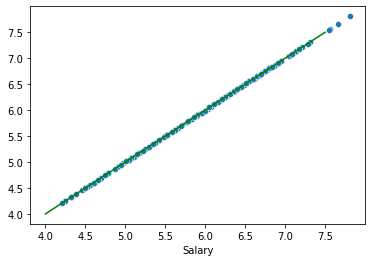

In [14]:
sns.scatterplot(x = y_train, y = y_train_pred);
sns.lineplot(x=[4,7.5], y =[4, 7.5], color="green")

<AxesSubplot:xlabel='Salary'>

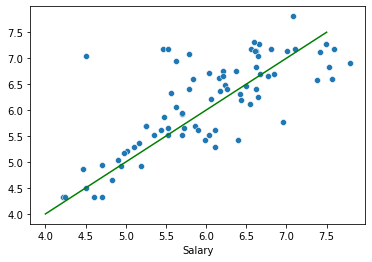

In [15]:
sns.scatterplot(x = y_test, y = y_test_pred)
sns.lineplot(x=[4,7.5], y =[4, 7.5], color="green")


6.

Observemos la complejidad del árbol resultado (no importa que no se vea en detalle, sólo es relevante la cantidad de nodos y la altura del modelo)

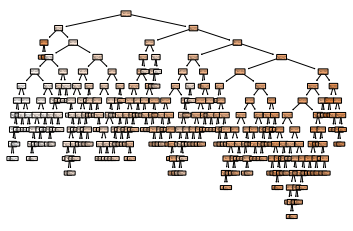

In [16]:
tree.plot_tree(my_tree,feature_names = X.columns,filled=True,rounded=True)
print()

7.

Cross validation

In [17]:
alpha_range = np.arange(0.0, 5.1, 0.1)
max_depth_range = np.arange(1, 10, 1)
min_samples_split_range = np.arange(3, 11, 1)
param_grid = dict(ccp_alpha = alpha_range, 
                 max_depth = max_depth_range,
                 min_samples_split = min_samples_split_range)
print(param_grid)

{'ccp_alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ]), 'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]), 'min_samples_split': array([ 3,  4,  5,  6,  7,  8,  9, 10])}


In [18]:
folds = KFold(n_splits=10, random_state=17, shuffle=True)

In [19]:
grid = GridSearchCV(my_tree, param_grid, cv = folds, scoring = 'neg_mean_squared_error')

In [20]:
grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=17, shuffle=True),
             estimator=DecisionTreeRegressor(random_state=40),
             param_grid={'ccp_alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ]),
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([ 3,  4,  5,  6,  7,  8,  9, 10])},
             scoring='neg_mean_squared_error')

In [21]:
grid.best_params_

{'ccp_alpha': 0.0, 'max_depth': 3, 'min_samples_split': 3}

In [22]:
my_best_tree = grid.best_estimator_

In [23]:
y_train_pred = my_best_tree.predict(X_train)
y_test_pred = my_best_tree.predict(X_test)

In [24]:
mean_squared_error(y_train, y_train_pred) 

0.13393153469029598

In [25]:
mean_squared_error(y_test, y_test_pred) 

0.25386123708950886

8. 

<AxesSubplot:xlabel='Salary'>

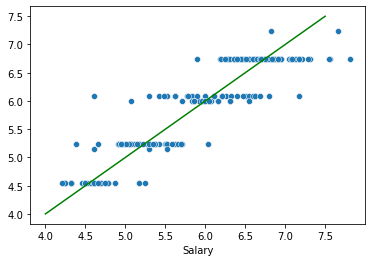

In [26]:
sns.scatterplot(x = y_train, y = y_train_pred);
sns.lineplot(x=[4,7.5], y =[4, 7.5], color="green")

<AxesSubplot:xlabel='Salary'>

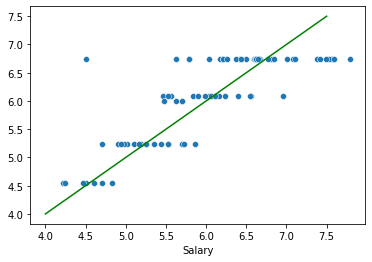

In [27]:
sns.scatterplot(x = y_test, y = y_test_pred);
sns.lineplot(x=[4,7.5], y =[4, 7.5], color="green")

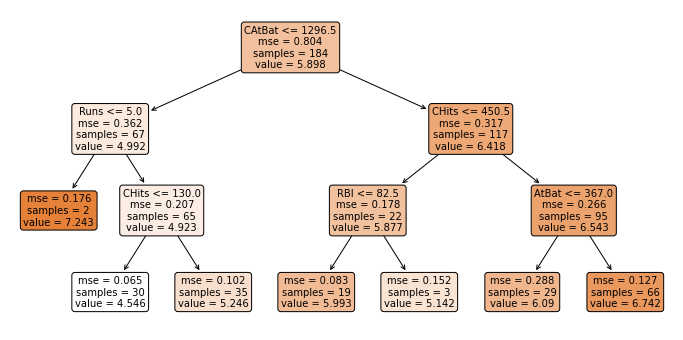

In [28]:
plt.figure(figsize=(12,6))
tree.plot_tree(my_best_tree,feature_names = X.columns,filled=True,rounded=True, fontsize = 10)
plt.show()

<div class="div-dhds-fondo-1"> Referencias y Material Adicional
<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M5/CLASE_34_CART/Presentacion/img/M5_CLASE_34_separador.png" align="center" />

</div>

## Referencias

---

<a href="https://www.statlearning.com/" target="_blank">An Introduction to Statistical Learning: with Applications in R, Chapter 8</a> (gratis!)

<a href="https://www.kaggle.com/mathchi/hitters-baseball-data" target="_blank">Dataset Hitters</a>

<a href="https://www.kaggle.com/tanercam/salary-prediction-project-of-us-baseball-player/data?select=Hitters.csv" target="_blank">Ejemplo de regresión lineal y regularización con Hitters</a>

https://laptrinhx.com/machine-learning-decision-tree-classification-2946896101/

http://www.stats.ox.ac.uk/~flaxman/HT17_lecture13.pdf